# 1. Read or Extact Data

In [16]:
import os
os.listdir(path="Dataset_Files")

['.gitkeep',
 '50_Startups.csv',
 'Churn_Modelling.csv',
 'Employee_attrition.csv',
 'Housing.csv',
 'Mall_Customers.csv',
 'movie_review_test.csv',
 'movie_review_train.csv',
 'Passenger_test.csv',
 'Passenger_train.csv',
 'Pearson.txt',
 'Position_Salaries.csv',
 'Result_Datasets',
 'Salary_Data.csv',
 'Social_Network_Ads.csv',
 'Stud_part1.csv',
 'Stud_part2.csv',
 'winequality-red.csv',
 'winequality-white.csv']

In [17]:
import pandas as pd
data=pd.read_csv("Dataset_Files\\Pearson.txt",sep="\t")
data

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


# 2. EDA

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


In [19]:
data.describe()

,Father,Son
count,1078.000000,1078.000000
mean,67.686827,68.684230
std,2.745827,2.816194
min,59.000000,58.500000
25%,65.800000,66.900000
50%,67.800000,68.600000
75%,69.600000,70.500000
max,75.400000,78.400000


In [20]:
data.isnull().sum()

Father    0
Son       0
dtype: int64

# 3. Feature Extraction

In [21]:
x=data["Father"]
y=data["Son"]
x

0       65.0
1       63.3
2       65.0
3       65.8
4       61.1
        ... 
1073    67.0
1074    71.3
1075    71.8
1076    70.7
1077    70.3
Name: Father, Length: 1078, dtype: float64

In [22]:
y

0       59.8
1       63.2
2       63.3
3       62.8
4       64.3
        ... 
1073    70.8
1074    68.3
1075    69.3
1076    69.3
1077    67.0
Name: Son, Length: 1078, dtype: float64

# 4. Model Building

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

LinearRegression()

In [25]:
import joblib
joblib.dump(model_lr,"New_Model_SLR.pickle")
load_model_lr=joblib.load("New_Model_SLR.pickle")

# 5. Model Prediction

In [26]:
y_pred=load_model_lr.predict(x_test.values.reshape(-1,1))
y_pred

array([[71.89782795],
       [68.80737031],
       [68.75586269],
       [71.33124405],
       [67.31364912],
       [69.94053811],
       [69.27093896],
       [70.14656862],
       [70.55862964],
       [68.18927878],
       [70.04355337],
       [69.94053811],
       [71.69179744],
       [67.05611098],
       [69.68299998],
       [67.93174065],
       [69.06490845],
       [68.65284743],
       [70.24958388],
       [67.67420251],
       [67.72571014],
       [69.88903049],
       [67.82872539],
       [70.35259913],
       [69.11641608],
       [69.42546184],
       [70.81616778],
       [70.71315252],
       [67.77721777],
       [67.62269488],
       [68.0347559 ],
       [68.54983218],
       [67.468172  ],
       [68.80737031],
       [70.50712201],
       [70.40410676],
       [67.72571014],
       [68.24078641],
       [69.52847709],
       [70.55862964],
       [70.19807625],
       [68.54983218],
       [68.85887794],
       [68.85887794],
       [69.83752286],
       [68

# 6. Model Testing

In [27]:
print(load_model_lr.score(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1)))
print(load_model_lr.score(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1)))

0.2662459085467348
0.24976537221748907


# 7. Model Evaluation

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
print(mean_squared_error(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1)))
print(mean_absolute_error(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1)))
print(np.sqrt(mean_squared_error(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1))))

print(load_model_lr.score(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1)))
print(load_model_lr.score(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1)))

7.073611111111114
2.115740740740741
2.6596261224298265
0.2662459085467348
0.24976537221748907


# 8. Result Visualization

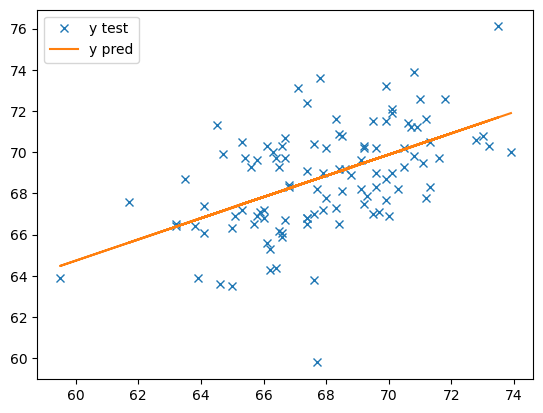

In [29]:
import matplotlib.pyplot as plt
plt.plot(x_test,y_test,"x",label="y test")
plt.plot(x_test,y_pred,label="y pred")
plt.legend()
plt.show()